In [27]:
import numpy as np
import keras
import tensorflow as tf

### Load data

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [29]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### The model

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
import matplotlib.pyplot as plt

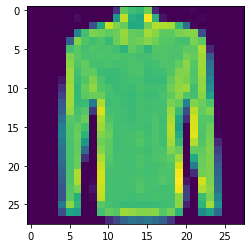

In [33]:
plt.imshow(train_images[40])

### Normalizing

In [34]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### The model

In [43]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(train_images, train_labels, epochs=15, verbose=True)

2021-09-27 15:53:17.619874: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4682 - accuracy: 0.8334

In [45]:
model.evaluate(test_images, test_labels, verbose=True)

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8905

[0.34472379088401794, 0.890500009059906]

In [65]:
class myCallBack(tf.keras.callbacks.Callback):
    def __init__(self, threshold=.6):
        super(myCallBack, self).__init__()
        self.threshold = threshold
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= self.threshold:
            print(f"\nReached {self.threshold}% accuracy so terminate training")
            self.model.stop_training = True

In [72]:
mc = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [73]:
mc.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
callbacks = myCallBack(threshold=.95)

In [75]:
mc.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4769 - accuracy: 0.8300

In [76]:
mc.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3489 - accuracy: 0.8839


[0.34894701838493347, 0.883899986743927]